In [44]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # for pretty plots
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

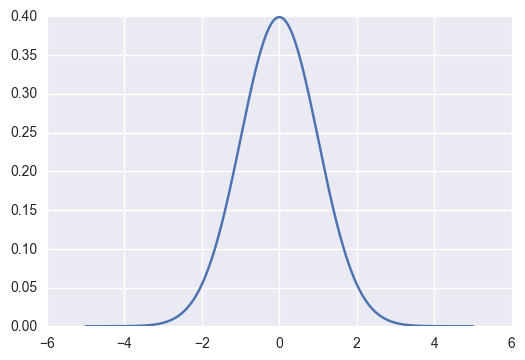

In [4]:
mu,sigma=-1,1
data = 

In [5]:
epochs = 10
M=200

In [38]:
def mlp(input, in_dim, output_dim):
    # construct learnable parameters within local scope
    w1=tf.get_variable("w0", [in_dim, 6], initializer=tf.random_normal_initializer())
    b1=tf.get_variable("b0", [6], initializer=tf.constant_initializer(0.0))
    w2=tf.get_variable("w1", [6, 5], initializer=tf.random_normal_initializer())
    b2=tf.get_variable("b1", [5], initializer=tf.constant_initializer(0.0))
    w3=tf.get_variable("w2", [5,output_dim], initializer=tf.random_normal_initializer())
    b3=tf.get_variable("b2", [output_dim], initializer=tf.constant_initializer(0.0))
    # nn operators
    fc1=tf.nn.tanh(tf.multiply(input,w1)+b1)
    fc2=tf.nn.tanh(tf.matmul(fc1,w2)+b2)
    fc3=tf.nn.tanh(tf.matmul(fc2,w3)+b3)
    return fc3

In [16]:
def discriminator(data, input_dimension, layers, activation, reuse=False):
    with tf.variable_scope("discriminator") as scope:
        if reuse:
            scope.reuse_variables()
        Mi = input_dimension
        ###weights and bias initialization
        weights = {}
        bias = {}
        for layer, i in zip(layers, range(len(layers))):
            Mo = layer
            weights["weight_{}".format(i)] = tf.get_variable("d_w_{}".format(i),
                                                initializer=tf.random_normal(dtype=tf.float32, shape=[Mi, Mo])) 
            bias["bias_{}".format(i)] = tf.get_variable("d_b_{}".format(i), initializer=tf.zeros(Mo))
            Mi = Mo
        weights["out"] = tf.get_variable("d_w_out", 
                                         initializer=tf.random_normal(shape=[Mo, 1], dtype=tf.float32))
        bias["out"] = tf.get_variable("d_b_out", initializer=tf.zeros(1))
        ###forward pass
        layer_input = data
        for layer in range(len(layers)):
            layer_input = activation(tf.add(tf.matmul(layer_input, weights["weight_{}".format(layer)]), 
                                            bias["bias_{}".format(layer)]))
        logits = tf.add(tf.matmul(layer_input, weights["out"]), bias["out"])
        layer_out = tf.nn.sigmoid(logits)
    return layer_out, logits

In [17]:
def generator(data, input_dimension, output_dimension, layers, activation, reuse=False):
    with tf.variable_scope("generator") as scope:
        if reuse:
            scope.reuse_variables()
        Mi = input_dimension
        ###weights and bias initialization
        weights = {}
        bias = {}
        for layer, i in zip(layers, range(len(layers))):
            Mo = layer
            weights["weight_{}".format(i)] = tf.get_variable("g_w_{}".format(i), 
                                                initializer=tf.random_normal(dtype=tf.float32, shape=[Mi, Mo]))
            bias["bias_{}".format(i)] = tf.get_variable("g_b_{}".format(i), initializer=tf.zeros(Mo))
            Mi = Mo
        weights["out"] = tf.get_variable("g_w_out", 
                                         initializer=tf.random_normal(shape=[Mo, output_dimension], dtype=tf.float32))
        bias["out"] = tf.get_variable("g_b_out", initializer=tf.zeros(output_dimension))
        ###forward pass
        layer_input = data
        for layer in range(len(layers)):
            layer_input = activation(tf.add(tf.matmul(layer_input, weights["weight_{}".format(layer)]), 
                                            bias["bias_{}".format(layer)]))
        layer_out = tf.nn.tanh(tf.add(tf.matmul(layer_input, weights["out"]), bias["out"]))
    return layer_out

TypeError: `Tensor` objects are not iterable when eager execution is not enabled. To iterate over this tensor use `tf.map_fn`.

In [42]:
tf.reset_default_graph()

In [48]:
N=10
ranger = 5
offset = np.random.random(N) * (float(ranger) / N)
samples = np.linspace(-ranger, ranger, N) + offset

In [49]:
samples

array([-4.83407802, -3.63783633, -2.47972201, -1.23580503, -0.07688046,
        0.94209673,  1.72276531,  3.03998615,  4.38008683,  5.18571704])